In [1]:
import os
import random
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 6
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)

In [3]:
image_size = 4
dataset_size = 4

images = []
labels = []

for file_path in glob.glob('./data/ising/L={}/*'.format(image_size)):
    with open(file_path, 'rb') as f:
        X = np.frombuffer(buffer=f.read(), dtype=np.int8, offset=0).reshape(-1, image_size, image_size)
        temperature = float(file_path.split('=')[-1].split('.bin')[0])
        y = np.full(shape=(X.shape[0],), fill_value=temperature)

        images.append(X)
        labels.append(y)

X = np.concatenate(images, axis=0)        
y = np.concatenate(labels, axis=0)   

# Permuting the dataset
idx = np.random.permutation(X.shape[0])
X = X[idx][:dataset_size]
y = y[idx][:dataset_size]

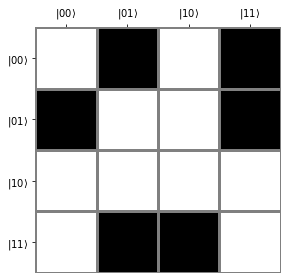

In [8]:
def heatmap(data, row_labels, col_labels, ax=None, **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="grey", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im

xlab = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
ylab = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
 
fig, ax = plt.subplots()
im = heatmap(X[2], xlab, ylab, ax=ax, cmap=plt.cm.gray, )

fig.tight_layout()
plt.savefig("ising.pdf", bbox_inches ="tight")